# Clustering
Cluster analysis is a statistical technique aimed to uncover groups (clusters) of observations that are homogeneous and separated from other groups. For this project, it might be useful to group a large number of cities by the values of their population and the number of yearly cooling days. The group of primary interest is the one that covers cities with the largest number of population and cooling days (the most vulnerable to heat waves). 

In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Read the data from the data.csv file
df = pd.read_csv(r'/Users/araij/Desktop/mda_project_cluster/data/MainData_Scaled.csv',sep="|")
df.head(3)

,Unnamed: 0,metroId,CDD,URB_AREA,URB_AREA_CORE,URB_AREA_HINTER,FRAGMENTATION,GDP_PC_REAL_PPP,POP_DEN,POP_TOT_GI,PWM_EX_CORE,T_Y0_14_SH_NAT,T_Y15_64_SH_NAT,T_Y65_MAX_SH_NAT,CONSTR_RAT,TREECOVER_SHARE_CORE
0,0,AT001,-0.456457,0.854794,-0.001510,2.830278,0.469287,0.644314,-0.303298,0.217575,0.177303,4.217221,4.196852,4.354632,-0.166822,-0.159529
1,1,AT002,-0.514449,-0.126610,-0.313467,0.325363,0.807422,0.408882,-0.472384,0.081780,0.624202,0.583800,0.642118,0.655404,-0.264498,0.324699
2,2,AT003,-0.514449,-0.221532,-0.344088,0.084398,1.353641,0.630861,-0.522553,-0.357560,0.241146,0.667327,0.614562,0.640666,-0.554939,-0.450963


In [3]:
# Drop the variables Country and City
df = df[['POP_TOT_GI','CDD']]

In [4]:
# There are rows with missing values for population. Drop the rows with NAs 
df=df.dropna(axis=0)

In [5]:
# Convert the data into an array
X = df.values

K-means clustering method is applied. The desired number of clusters (k) needs to be specified in advance. The K-means algorithm then assigns each observation to exactly one of the k clusters. The algorithm is run multiple times from different random initial configurations aimed to find the best separated clusters. The K-means algorithm is 

For clustering, the data needs to be standardized given that the variables in the data set have different scales and variances. The dataset has already been standardized by using StandardScaler(). Clusters with centeroids are visualized then on the scatterplot. 

In [6]:
# Initialize Kmeans for 2 clusters and fit it to the data
cluster_with_scaling = KMeans(n_clusters=2, n_init=20,init='random',random_state=0)
cluster_with_scaling.fit(X)

KMeans(init='random', n_clusters=2, n_init=20, random_state=0)

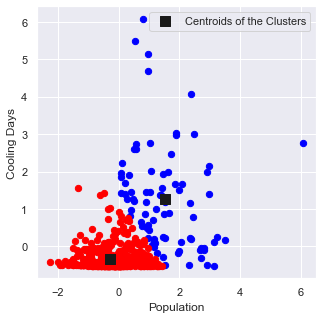

In [7]:
y=cluster_with_scaling.predict(X)
fig,ax = plt.subplots(figsize=(5,5))
idx_1 = y==1
idx_0 = y==0
color_1='blue'
color_0 ='red'
ax.scatter(X[idx_1,0],X[idx_1,1],s=40,color=color_1,label=None)
ax.scatter(X[idx_0,0],X[idx_0,1],s=40,color=color_0,label=None)

ax.scatter(cluster_with_scaling.cluster_centers_[:,0],cluster_with_scaling.cluster_centers_[:,1],s=120,
           color='k',marker='s',
           label='Centroids of the Clusters')

ax.set_xlabel('Population')
ax.set_ylabel('Cooling Days');
ax.legend();

As seen from the scatterplot, there is a group of cities with population larger than 135 thousands and cooling days larger than 730 days (calculated by using the values of the mean and standard deviation of the dataset before scalling applied). These cities could be susceptible to heat waves and damages associated with heat waves more than cities in other groups.  